In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('./data_cleaned/main_df.csv')


In [3]:
# Standard deviation

main_df['price (USD)'].std()

1131566.5258083148

In [4]:
# Range

range = main_df['price (USD)'].max() - main_df['price (USD)'].min()
range

9999200

In [5]:
#Quartiles 
median = main_df['price (USD)'].median()
Q1 = main_df['price (USD)'].quantile(q=0.25)
Q3 = main_df['price (USD)'].quantile(q=0.75)
min_val = main_df['price (USD)'].quantile(q=0)
max_val = main_df['price (USD)'].quantile(q=1)

print(min_val, Q1, median, Q3, max_val)

800.0 118000.0 648000.0 1532937.5 10000000.0


<AxesSubplot:xlabel='price (USD)', ylabel='Count'>

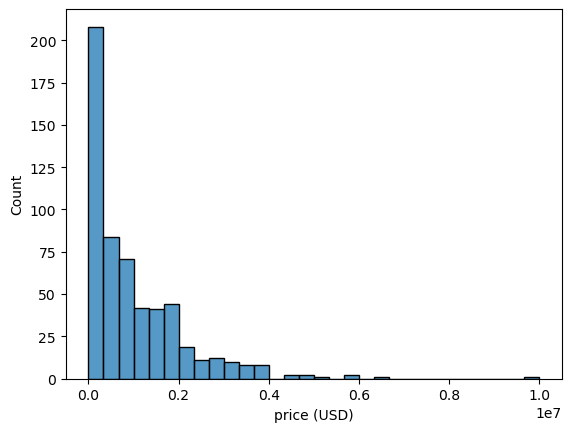

In [6]:
sns.histplot(main_df['price (USD)'])

<AxesSubplot:xlabel='price (USD)'>

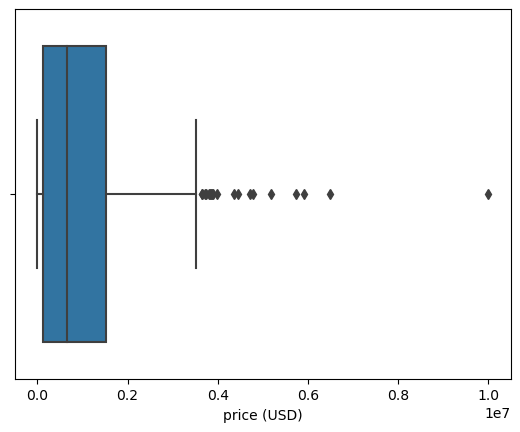

In [7]:
sns.boxplot(x=main_df['price (USD)'])

The data of the boxplot its completely biased, we need to do the lineal scaling and apply no lineal transformation to transform the data in simetric values

### No linear transformation

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

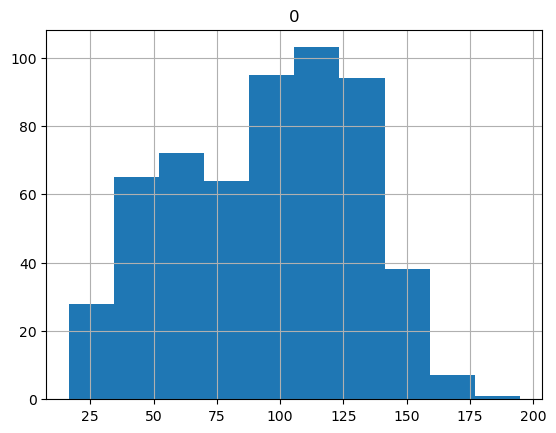

In [8]:
from scipy import stats

transformed_column, lambda_value = stats.boxcox(main_df['price (USD)'])
transformed_column = transformed_column.reshape((567,1))
distributed_df = pd.DataFrame(transformed_column)
distributed_df.hist()


<AxesSubplot:xlabel='0'>

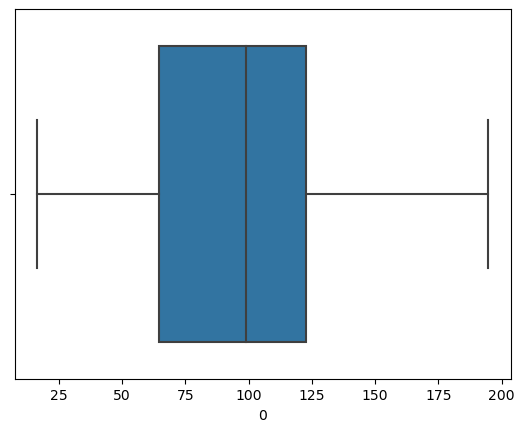

In [9]:
sns.boxplot(x=distributed_df[0])

### Linear transformation

In [10]:
p=100000 
distributed_df[0] = distributed_df[0].apply(lambda x: np.tanh(x/p))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

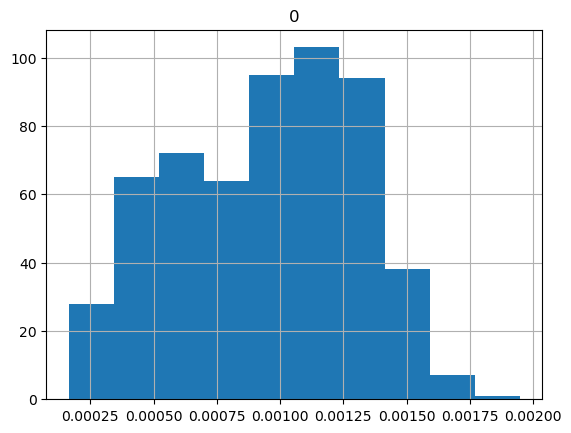

In [11]:
distributed_df.hist()

In [12]:
manufacturer_dummies = pd.get_dummies(main_df['manufacturer'])

In [13]:
main_df['price (USD)'] = distributed_df[0]

In [14]:
main_df.to_csv('./csv_ML_files/ML_df.csv', index=False)
manufacturer_dummies.to_csv('./csv_ML_files/Manufacturer_dummies.csv', index=False)
